In [68]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from colorama import Fore
from pathlib import Path

In [31]:
import warnings
warnings.simplefilter(action='ignore')

### Get and prepare Data

In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [11]:
X_train.shape , X_valid.shape , X_test.shape

((55000, 28, 28), (5000, 28, 28), (10000, 28, 28))

In [12]:
type(X_train)

numpy.ndarray

In [13]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [14]:
np.max(X_train), np.min(X_train)

(255, 0)

In [15]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [16]:
print(np.unique(y_train))
print(np.unique(y_valid))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


<hr>

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

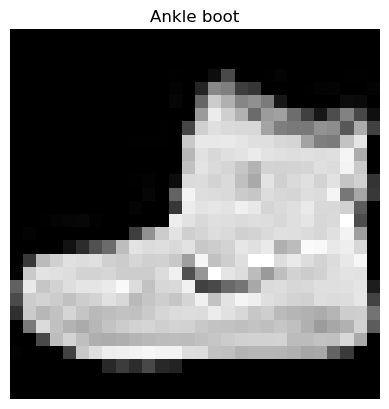

In [20]:
plt.imshow(X_train[0], cmap = "gray")
plt.title(class_names[y_train[0]])
plt.axis("off")
plt.show()

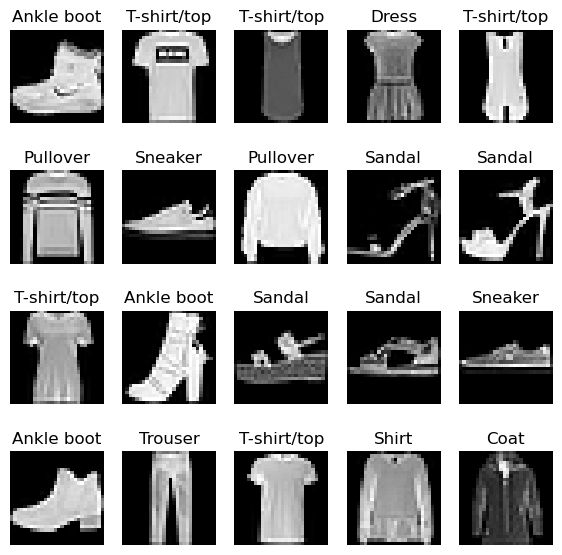

In [25]:
fig, axis = plt.subplots(4, 5, figsize = (7,7))
axis = axis.flatten()

for i, ax in enumerate(axis):
  ax.imshow(X_train[i], cmap = "gray")
  ax.set_title(class_names[y_train[i]])
  ax.axis("off")

# Build Model

In [27]:
model = tf.keras.Sequential([
     tf.keras.layers.Rescaling(scale = 1/255, input_shape = [28, 28]), # for scaling  , scale data is very important
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(300, activation="relu" ),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(10, activation="softmax") ])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28)            0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd"
              , metrics=["accuracy"])

In [30]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 4s 2ms/step - loss: 0.6912 - accuracy: 0.7752 - val_loss: 0.5148 - val_accuracy: 0.8218
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4818 - accuracy: 0.8329 - val_loss: 0.4454 - val_accuracy: 0.8450
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4384 - accuracy: 0.8468 - val_loss: 0.4469 - val_accuracy: 0.8416
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4128 - accuracy: 0.8555 - val_loss: 0.4172 - val_accuracy: 0.8508
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3913 - accuracy: 0.8620 - val_loss: 0.4007 - val_accuracy: 0.8594
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3759 - accuracy: 0.8669 - val_loss: 0.3759 - val_accuracy: 0.8688
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3631 - accuracy: 0.8713 - val_loss: 0.3644 - val_accurac

In [34]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.691218,0.775164,0.514803,0.8218
1,0.481845,0.832891,0.445367,0.8450
2,0.438396,0.846764,0.446902,0.8416
3,0.412794,0.855491,0.417197,0.8508
4,0.391297,0.862000,0.400660,0.8594
5,0.375894,0.866855,0.375913,0.8688
6,0.363105,0.871345,0.364407,0.8700
7,0.352499,0.875564,0.368863,0.8668
8,0.341950,0.879073,0.349909,0.8748
9,0.332313,0.881691,0.357918,0.8728


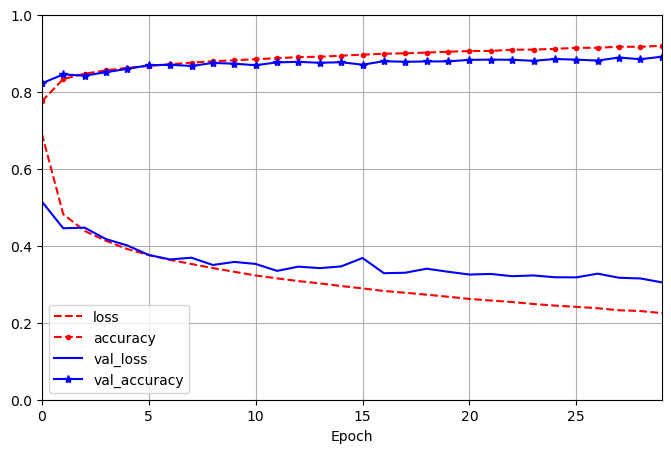

In [35]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot( figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])
plt.show()


In [36]:
model.evaluate(X_test, y_test , batch_size = 1)

10000/10000 [==============================] - 11s 1ms/step - loss: 0.3229 - accuracy: 0.8853


[0.32289955019950867, 0.8852999806404114]

## Using the model to make predictions


In [37]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 77ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.01, 0.  , 0.95],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [39]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [48]:
print('our predict\n')
print(Fore.BLUE + str(np.array(class_names)[y_pred]))

our predict

['Ankle boot' 'Pullover' 'Trouser']


# tuning hyperparameters

In [53]:
import keras_tuner as kt

In [59]:
class MyClassificationHyperModel(kt.HyperModel):

     def build(self, hp):
    
          n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
          n_neurons = hp.Int("n_neurons", min_value=10, max_value=300)
          learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1, sampling="log")
          optimizer = hp.Choice("optimizer", values=["sgd", "adam"])

          if optimizer == "sgd": optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
          else: optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

          model = tf.keras.Sequential()
          model.add(tf.keras.layers.Flatten())

          for _ in range(n_hidden):

              model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))

          model.add(tf.keras.layers.Dense(10, activation="softmax"))
          model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

          return model

     def fit(self, hp, model, X, y, **kwargs):
        
            if hp.Boolean("normalize"):
                norm_layer = tf.keras.layers.Normalization()
                X = norm_layer(X)
                
            return model.fit(X, y, **kwargs)


In [61]:
hyperband_tuner = kt.Hyperband( MyClassificationHyperModel(),
                               objective="val_accuracy", seed=42, max_epochs=10, factor=3,
                                hyperband_iterations=2, overwrite=True,
                                directory="my_fashion_mnist", project_name="hyperband")


In [62]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3)

hyperband_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 12s]
val_accuracy: 0.10419999808073044

Best val_accuracy So Far: 0.8751999735832214
Total elapsed time: 00h 16m 04s


In [69]:
best_trial = hyperband_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()


Trial 0054 summary
Hyperparameters:
n_hidden: 5
n_neurons: 125
learning_rate: 0.0004060552513069895
optimizer: adam
normalize: False
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0048
Score: 0.8751999735832214


In [70]:
top3_models = hyperband_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [79]:
best_model.fit(X_train_full, y_train_full, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1803 - accuracy: 0.9316
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1780 - accuracy: 0.9327
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1758 - accuracy: 0.9337
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1758 - accuracy: 0.9338
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1713 - accuracy: 0.9342
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1719 - accuracy: 0.9362
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1654 - accuracy: 0.9362
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1743 - accuracy: 0.9344
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1709 - accuracy: 0.9363
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.167

In [80]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test , batch_size = 1)

10000/10000 [==============================] - 12s 1ms/step - loss: 0.6416 - accuracy: 0.8874


In [81]:
print(Fore.BLUE + 'The final accuracy: ' + str(0.8874*100) + ' %')

The final accuracy: 88.74 %
